**Komentari**

Ostavljat ću komentare dok punimo bilježnicu da znamo u svakom trenutku što je što. Kasnije možemo lagano ih samo obrisati za završnu verziju.

Zasad ubacujem podatke u bilježnicu i malo ću poraditi s njima te ih rasporediti lijepo u tablice da možemo lagano raditi s njima što želimo.

## Podaci

Dodajemo sve biblioteke koje će nam trebati (možda treba pozvati %pip install za slučaj da na računalu nisu instalirane)

In [194]:
import pandas as pd
import matplotlib.pyplot as plt

Skidanje podataka s našeg repozitorija na GitHub-u i njihovo lokalno spremanje

In [3]:
def skini(url: str, datoteka: str):
    import urllib.request as rq, pathlib
    with rq.urlopen(url) as konekcija:
        pathlib.Path(datoteka).write_bytes(konekcija.read())
        
test_podaci = 'https://raw.githubusercontent.com/jbrigljevic/str_uc/main/Podaci/test.csv'
train_podaci = 'https://raw.githubusercontent.com/jbrigljevic/str_uc/main/Podaci/train.csv'
skini(test_podaci, 'test_podaci.csv')
skini(train_podaci, 'train_podaci.csv')

Učitavanje u Dataframe

In [4]:
df_test = pd.read_csv('test_podaci.csv')
df_train = pd.read_csv('train_podaci.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Slijede skupovi ključnih riječi i lokacija te mapa s textovima samih tweetova i pripadajuće oznake.

In [8]:
skup_keyword_test = {keyword for keyword in df_test['keyword']}
skup_keyword_train = {keyword for keyword in df_train['keyword']}
skup_keyword_train

{'ablaze',
 'accident',
 'aftershock',
 'airplane%20accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew%20up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown%20up',
 'body%20bag',
 'body%20bagging',
 'body%20bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge%20collapse',
 'buildings%20burning',
 'buildings%20on%20fire',
 'burned',
 'burning',
 'burning%20buildings',
 'bush%20fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical%20emergency',
 'cliff%20fall',
 'collapse',
 'collapsed',
 'collide',
 'collided',
 'collision',
 'crash',
 'crashed',
 'crush',
 'crushed',
 'curfew',
 'cyclone',
 'damage',
 'danger',
 'dead',
 'death',
 'deaths',
 'debris',
 'deluge',
 'deluged',
 'demolish',
 'demolished',
 'demolition',
 'derail',
 'derailed',
 'derailment',
 'desolate',
 'de

In [9]:
skup_keyword_test

{'ablaze',
 'accident',
 'aftershock',
 'airplane%20accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew%20up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown%20up',
 'body%20bag',
 'body%20bagging',
 'body%20bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge%20collapse',
 'buildings%20burning',
 'buildings%20on%20fire',
 'burned',
 'burning',
 'burning%20buildings',
 'bush%20fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical%20emergency',
 'cliff%20fall',
 'collapse',
 'collapsed',
 'collide',
 'collided',
 'collision',
 'crash',
 'crashed',
 'crush',
 'crushed',
 'curfew',
 'cyclone',
 'damage',
 'danger',
 'dead',
 'death',
 'deaths',
 'debris',
 'deluge',
 'deluged',
 'demolish',
 'demolished',
 'demolition',
 'derail',
 'derailed',
 'derailment',
 'desolate',
 'de

In [10]:
skup_location_test = {location for location in df_test['location']}
skup_location_train = {location for location in df_train['location']}
skup_location_train

{nan,
 'Former Yugoslav Republic of Macedonia',
 "St. Patrick's Purgatory",
 'Houston ',
 'Hinton, W.Va.',
 'Swag Francisco',
 'Am International',
 'Killafornia made me ',
 'CHICAGO (312)',
 'France',
 'EPTX',
 'Sunny South florida ',
 'Augusta, Maine, 04330',
 'Elmwood Park, NJ',
 'South Central Wales',
 'Kabul, Tuebingen, Innsbruck',
 'Pueblo, CO',
 'Monterrey, MÌ©xico',
 'Nairobi , Kenya',
 "i'm a Citizen of the World",
 'proudly South African',
 'Pomfret/Providence',
 'The Sanctuary Network, Rome',
 'Whole World ',
 'Prehistoric Earth',
 'Nowhere. Everywhere.',
 'Leduc, Alberta, Canada',
 'Burbank,CA',
 'Atlanta Georgia ',
 'Halifax, Nouvelle-Ìäcosse',
 'The Great State of Maine ',
 'Sacramento',
 'State College, Pa',
 'The Forever Girl',
 'Soul Somalia/Body Montreal',
 'NYC / International',
 'Toronto',
 'Vietnam',
 'San Diego, California',
 '2B Hindhede Rd, Singapore',
 'Hollywood',
 "'soooota",
 'Charlotte',
 'ALWAYS DYING NEVER RESTING',
 'London, Riyadh',
 'Magnolia, Fiore ',


In [11]:
lista_text_train = [text for text in df_train['text']]
lista_oznaka_train = [oznaka for oznaka in df_train['target']]
mapa_text_train = {lista_text_train[i]:lista_oznaka_train[i] for i in range(len(lista_text_train))}
mapa_text_train

{'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all': 1,
 'Forest fire near La Ronge Sask. Canada': 1,
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected": 1,
 '13,000 people receive #wildfires evacuation orders in California ': 1,
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ': 1,
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires': 1,
 '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas': 1,
 "I'm on top of the hill and I can see a fire in the woods...": 1,
 "There's an emergency evacuation happening now in the building across the street": 1,
 "I'm afraid that the tornado is coming to our area...": 1,
 'Three people died from the heat wave so far': 1,
 'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WH

## Ključne riječi

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [16]:
df_train['keyword'].notnull().count()

7613

In [82]:
graf_podaci = fja(df_train)

In [160]:
def graf_ne_null(df):
    mapa = {'keyword':df['keyword'].notnull().sum(), 'location':df['location'].notnull().sum()}
    fig, ax = plt.subplots()
    ax.bar([1, 2, 3], [len(df.index), mapa['keyword'], mapa['location']], tick_label = ['Total', 'Keyword', 'Location'])
    plt.title('Broj ne-null parametara')
    plt.show()

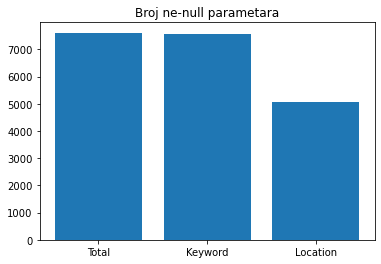

In [161]:
graf_ne_null(df_train)

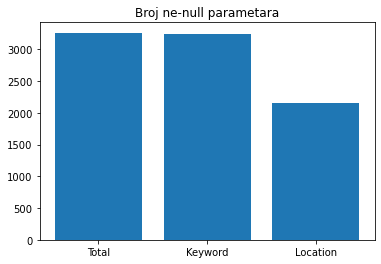

In [162]:
graf_ne_null(df_test)

In [163]:
skup_keyword_test = {keyword for keyword in df_test['keyword']}
skup_keyword_train = {keyword for keyword in df_train['keyword']}
skup_keyword_train

{'ablaze',
 'accident',
 'aftershock',
 'airplane%20accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew%20up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown%20up',
 'body%20bag',
 'body%20bagging',
 'body%20bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge%20collapse',
 'buildings%20burning',
 'buildings%20on%20fire',
 'burned',
 'burning',
 'burning%20buildings',
 'bush%20fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical%20emergency',
 'cliff%20fall',
 'collapse',
 'collapsed',
 'collide',
 'collided',
 'collision',
 'crash',
 'crashed',
 'crush',
 'crushed',
 'curfew',
 'cyclone',
 'damage',
 'danger',
 'dead',
 'death',
 'deaths',
 'debris',
 'deluge',
 'deluged',
 'demolish',
 'demolished',
 'demolition',
 'derail',
 'derailed',
 'derailment',
 'desolate',
 'de

In [174]:
df_train['keyword'].value_counts()['fatalities']

45

In [211]:
def graf_br_kljucnih(df):
    count_keyword = {}
    for keyword in df['keyword']:
        if(not pd.isna(keyword)):
            count_keyword[keyword] = df['keyword'].value_counts()[keyword]
                
    fig, ax = plt.subplots(figsize = (10, 100))
    ax.barh(list(count_keyword.keys()), list(count_keyword.values()))
    plt.title('Frekvencija ključnih riječi')
    plt.show()

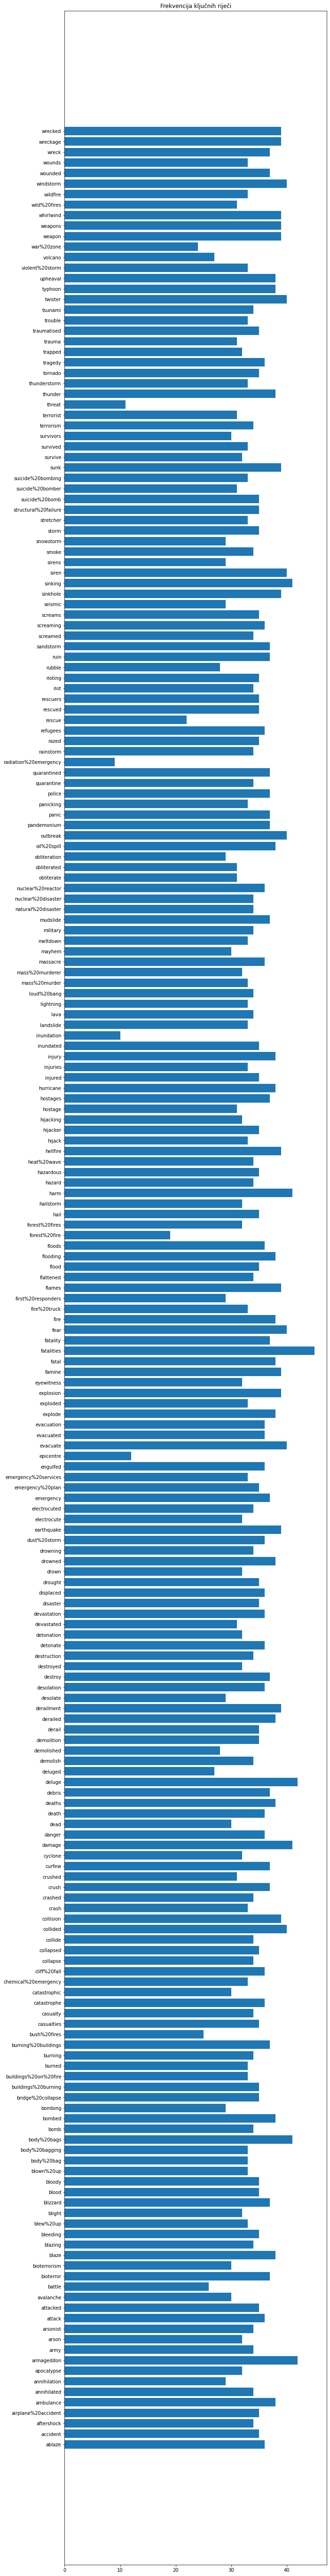

In [212]:
graf_br_kljucnih(df_train)